# TINDER CNN IMPLEMENTATION

In [12]:
%matplotlib inline

In [13]:
import cv2
import sys
import numpy as np
import os
from skimage import io
from scipy import misc
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from skimage.transform import resize

In [14]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, Convolution2D, MaxPooling2D, Flatten
from keras.regularizers import l2
from keras.optimizers import RMSprop

### Init settings

In [15]:
img_size = 100
_lambda = 0.01

#### Load data

In [16]:
data = np.load('processed_images.npy')
labels = np.load('processed_labels.npy')
print(data.shape)
print(labels.shape)

(4, 100, 100, 3)
(4,)


#### Oversampling to even out likes and dislikes

In [17]:
from collections import Counter

data = np.reshape(data, (len(data), img_size**2*3))

print(Counter(labels))

ros = RandomOverSampler()
data_resampled, labels_resampled = ros.fit_sample(data, labels)

print(Counter(labels_resampled))
data_resampled = np.reshape(data_resampled, (len(data_resampled), img_size, img_size, 3))

Counter({1: 3, 0: 1})
Counter({1: 3, 0: 3})


#### Splitting Dataset into train and test

In [18]:
X_train, X_test, y_train, y_test = train_test_split(np.array(data_resampled),np.array(labels_resampled), train_size=0.9, random_state = 20)

nb_classes = 2
y_train = np.array(y_train) 
y_test = np.array(y_test)
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

#for i in range(2):
#    plt.imshow(X_train[i])
#    plt.show()

Training matrix shape (5, 100, 100, 3)
Testing matrix shape (1, 100, 100, 3)


#### Defining the model

In [19]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), padding='same',
                        input_shape=(img_size, img_size, 3), activation='relu'))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Convolution2D(64, (3, 3), padding='same', activation='relu'))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(1000))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.0001, rho=0.9, epsilon=1e-06, decay=1e-6)
, metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=64, epochs=10, verbose=2, validation_split=0.2)
loss_and_metrics = model.evaluate(X_test, Y_test)
print(loss_and_metrics)

Train on 4 samples, validate on 1 samples
Epoch 1/10
0s - loss: 0.6876 - acc: 0.5000 - val_loss: 0.6103 - val_acc: 1.0000
Epoch 2/10
0s - loss: 0.7024 - acc: 0.7500 - val_loss: 0.5962 - val_acc: 1.0000
Epoch 3/10
0s - loss: 0.7394 - acc: 0.2500 - val_loss: 0.5813 - val_acc: 1.0000
Epoch 4/10
0s - loss: 0.6272 - acc: 0.5000 - val_loss: 0.5896 - val_acc: 1.0000
Epoch 5/10
0s - loss: 0.6264 - acc: 0.7500 - val_loss: 0.5853 - val_acc: 1.0000
Epoch 6/10
0s - loss: 0.6518 - acc: 0.5000 - val_loss: 0.6261 - val_acc: 1.0000
Epoch 7/10
0s - loss: 0.6599 - acc: 0.5000 - val_loss: 0.5797 - val_acc: 1.0000
Epoch 8/10
0s - loss: 0.8371 - acc: 0.2500 - val_loss: 0.5918 - val_acc: 1.0000
Epoch 9/10
0s - loss: 0.5953 - acc: 0.7500 - val_loss: 0.5771 - val_acc: 1.0000
Epoch 10/10
0s - loss: 0.6947 - acc: 0.5000 - val_loss: 0.5877 - val_acc: 1.0000
1/1 [==============================] - 0s
[0.76073706150054932, 0.0]


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


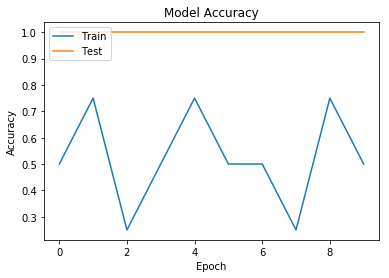

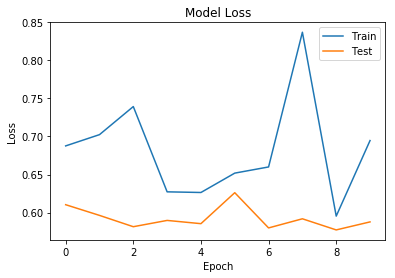

In [20]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()